Color 1:
Color 2:


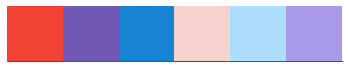

In [57]:
# Libraries
import os
import sys
import wandb
import time
import random
from tqdm import tqdm
import warnings
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from IPython.display import display_html
import cv2


# Environment check
warnings.filterwarnings("ignore")
os.environ["WANDB_SILENT"] = "true"
CONFIG = {'competition': 'greatReef', '_wandb_kernel': 'aot'}


# Custom colors
class color:
    S = '\033[1m' + '\033[94m'
    E = '\033[0m'
    P = '\033[0;35m'
    
my_colors = ["#f44336","#7158B7", "#1583D2", "#f7d3ce", "#ADDEFF", "#A99AEA"]
print(color.S+"Color 1:"+color.E)
print(color.P+"Color 2:"+color.E)
sns.palplot(sns.color_palette(my_colors))

# Set Style
sns.set_style("white")
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 14})

In [58]:
# Read training dataset
train_df = pd.read_csv("./kaggle/input/train.csv")
test_df = pd.read_csv("./kaggle/input/test.csv")

In [59]:
df1_styler = train_df.sample(n=5).style.set_table_attributes("style='display:inline'").set_caption('Sample Train Data')
df2_styler = test_df.head().style.set_table_attributes("style='display:inline'").set_caption('Test Data (the rest is hidden)')

display_html(df1_styler._repr_html_(), raw=True)
print("\n")
display_html(df2_styler._repr_html_(), raw=True)

,video_id,sequence,video_frame,sequence_frame,image_id,annotations
21083,2,29859,8342,570,2-8342,[]
13049,1,60754,9484,1068,1-9484,"[{'x': 437, 'y': 300, 'width': 30, 'height': 30}]"
4373,0,35305,8172,518,0-8172,[]
19725,2,22643,5823,460,2-5823,"[{'x': 927, 'y': 210, 'width': 69, 'height': 49}, {'x': 1108, 'y': 260, 'width': 73, 'height': 63}, {'x': 221, 'y': 514, 'width': 63, 'height': 58}, {'x': 183, 'y': 469, 'width': 89, 'height': 77}, {'x': 438, 'y': 343, 'width': 62, 'height': 67}, {'x': 92, 'y': 477, 'width': 59, 'height': 44}, {'x': 347, 'y': 525, 'width': 52, 'height': 57}, {'x': 376, 'y': 362, 'width': 31, 'height': 31}]"
10419,1,8503,5267,1439,1-5267,"[{'x': 558, 'y': 178, 'width': 46, 'height': 45}]"


,video_id,sequence,video_frame,sequence_frame,image_id
0,3,17063,0,0,3-0
1,3,17063,1,1,3-1
2,3,17063,2,2,3-2


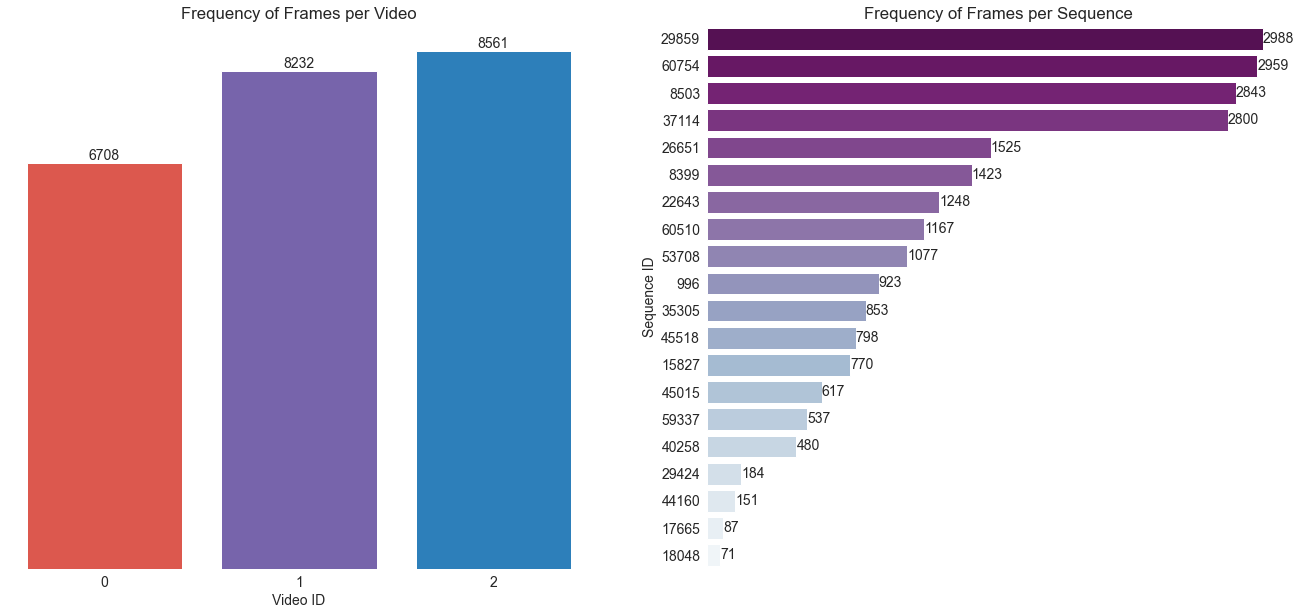

In [60]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(23, 10))

# --- Plot 1 ---
df1 = train_df["video_id"].value_counts().reset_index()

sns.barplot(data=df1, x="index", y="video_id", ax=ax1,
            palette=my_colors)
ax1.bar_label(ax1.containers[0])
ax1.set_xlabel("Video ID")
ax1.set_ylabel("")
ax1.title.set_text("Frequency of Frames per Video")
ax1.set_yticks([])

# --- Plot 2  ---
df2 = train_df["sequence"].value_counts().reset_index()

sns.barplot(data=df2, y="index", x="sequence", order=df2["index"],
            ax=ax2, orient="h", palette="BuPu_r")
ax2.bar_label(ax2.containers[0])
ax2.set_xlabel("")
ax2.set_ylabel("Sequence ID")
ax2.title.set_text("Frequency of Frames per Sequence")
ax2.set_xticks([])

sns.despine(top=True, right=True, left=True, bottom=True, ax=ax1)
sns.despine(top=True, right=True, left=True, bottom=True, ax=ax2)

3.5.1
<BarContainer object of 4 artists>


[]

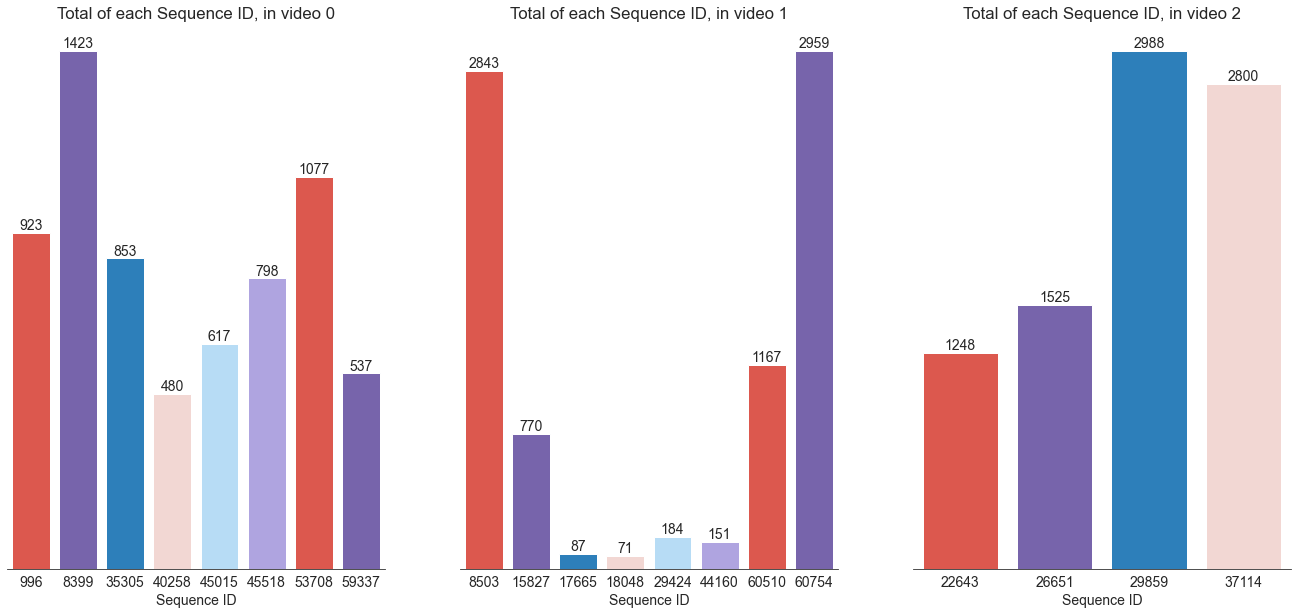

In [61]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(23, 10))

# --- Plot 1 ---
train_df_vid0 = train_df.loc[train_df['video_id'] == 0]
df1 = train_df_vid0["sequence"].value_counts().reset_index()

sns.barplot(data=df1, x="index", y="sequence", ax=ax1,
            palette=my_colors)
ax1.bar_label(ax1.containers[0])
ax1.set_xlabel("Sequence ID")
ax1.set_ylabel("")
ax1.title.set_text("Total of each Sequence ID, in video 0")
ax1.set_yticks([])

# --- Plot 2 ---
train_df_vid0 = train_df.loc[train_df['video_id'] == 1]
df1 = train_df_vid0["sequence"].value_counts().reset_index()

sns.barplot(data=df1, x="index", y="sequence", ax=ax2,
            palette=my_colors)
ax2.bar_label(ax2.containers[0])
ax2.set_xlabel("Sequence ID")
ax2.set_ylabel("")
ax2.title.set_text("Total of each Sequence ID, in video 1")
ax2.set_yticks([])

# --- Plot 3 ---
train_df_vid0 = train_df.loc[train_df['video_id'] == 2]
df1 = train_df_vid0["sequence"].value_counts().reset_index()

sns.barplot(data=df1, x="index", y="sequence", ax=ax3,
            palette=my_colors)
print(mpl.__version__) #make sure it is 3.5.1
print(ax3.containers[0])
ax3.bar_label(ax3.containers[0])
ax3.set_xlabel("Sequence ID")
ax3.set_ylabel("")
ax3.title.set_text("Total of each Sequence ID, in video 2")
ax3.set_yticks([])

In [62]:
# Calculate the number of total annotations within the frame
train_df["no_annotations"] = train_df["annotations"].apply(lambda x: len(eval(x)))

There are 134 frames with 5 annotations.
There are 59 frames with 6 annotations.
There are 61 frames with 7 annotations.
There are 58 frames with 8 annotations.
There are 32 frames with 9 annotations.
There are 26 frames with 10 annotations.
There are 44 frames with 11 annotations.
There are 17 frames with 12 annotations.
There are 19 frames with 13 annotations.
There are 22 frames with 14 annotations.
There are 40 frames with 15 annotations.
There are 28 frames with 16 annotations.
There are 19 frames with 17 annotations.
There are 3 frames with 18 annotations.
There are 18582 ~79% frames with no annotation and 
 only 4919 ~21% frames with at least 1 annotation.


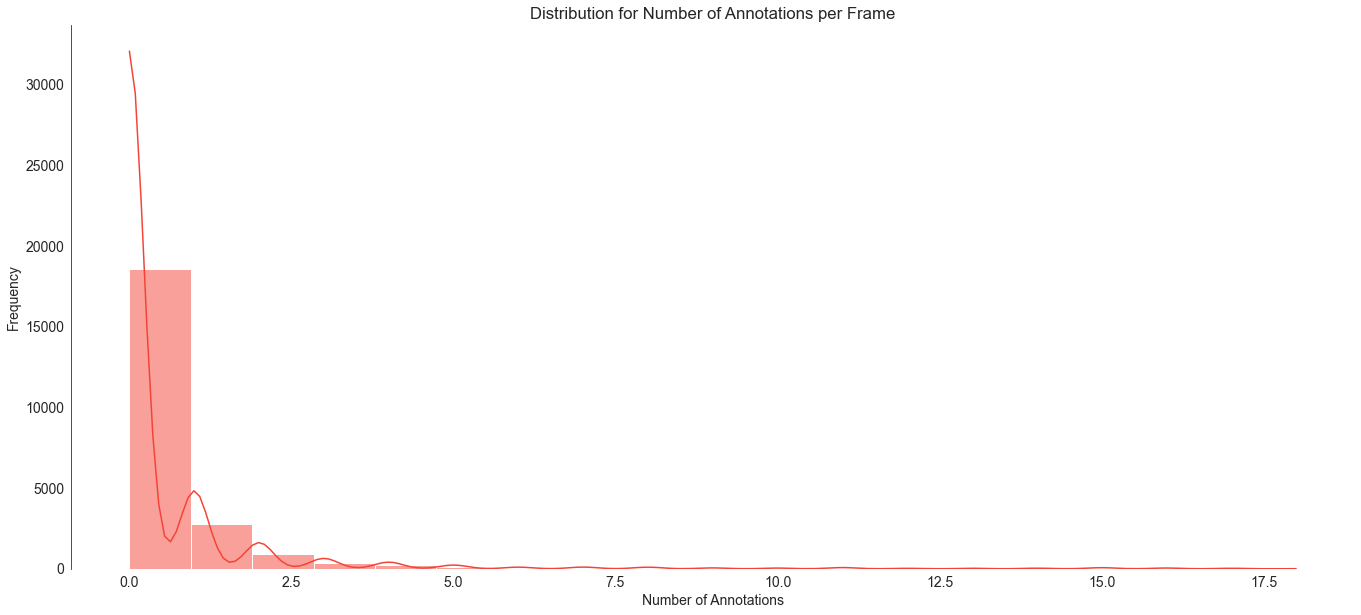

In [63]:
# % annotations
n = len(train_df)
no_annot = round(train_df[train_df["no_annotations"]==0]).shape[0]
with_annot = round(train_df[train_df["no_annotations"]!=0]).shape[0]
no_annot_perc = round(train_df[train_df["no_annotations"]==0].shape[0]/n*100)
with_annot_perc = round(train_df[train_df["no_annotations"]!=0].shape[0]/n*100)
for x in range(5, 19, 1):
      xx = round(train_df[train_df.no_annotations==x]).shape[0]
      print(color.P + f"There are {xx} frames with " + str(x) + " annotations." + color.E)

print(color.S + f"There are {no_annot} ~{no_annot_perc}% frames with no annotation and" + color.E,
      "\n",
      color.S + f"only {with_annot} ~{with_annot_perc}% frames with at least 1 annotation." + color.E)

# Plot
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(23, 10))
sns.histplot(train_df["no_annotations"], bins=19, kde=True, element="bars", 
             color=my_colors[0])
#ax1.bar_label(ax1.containers[0])
ax1.set_xlabel("Number of Annotations")
ax1.set_ylabel("Frequency")
ax1.title.set_text("Distribution for Number of Annotations per Frame")

sns.despine(top=True, right=True, left=False, bottom=True)

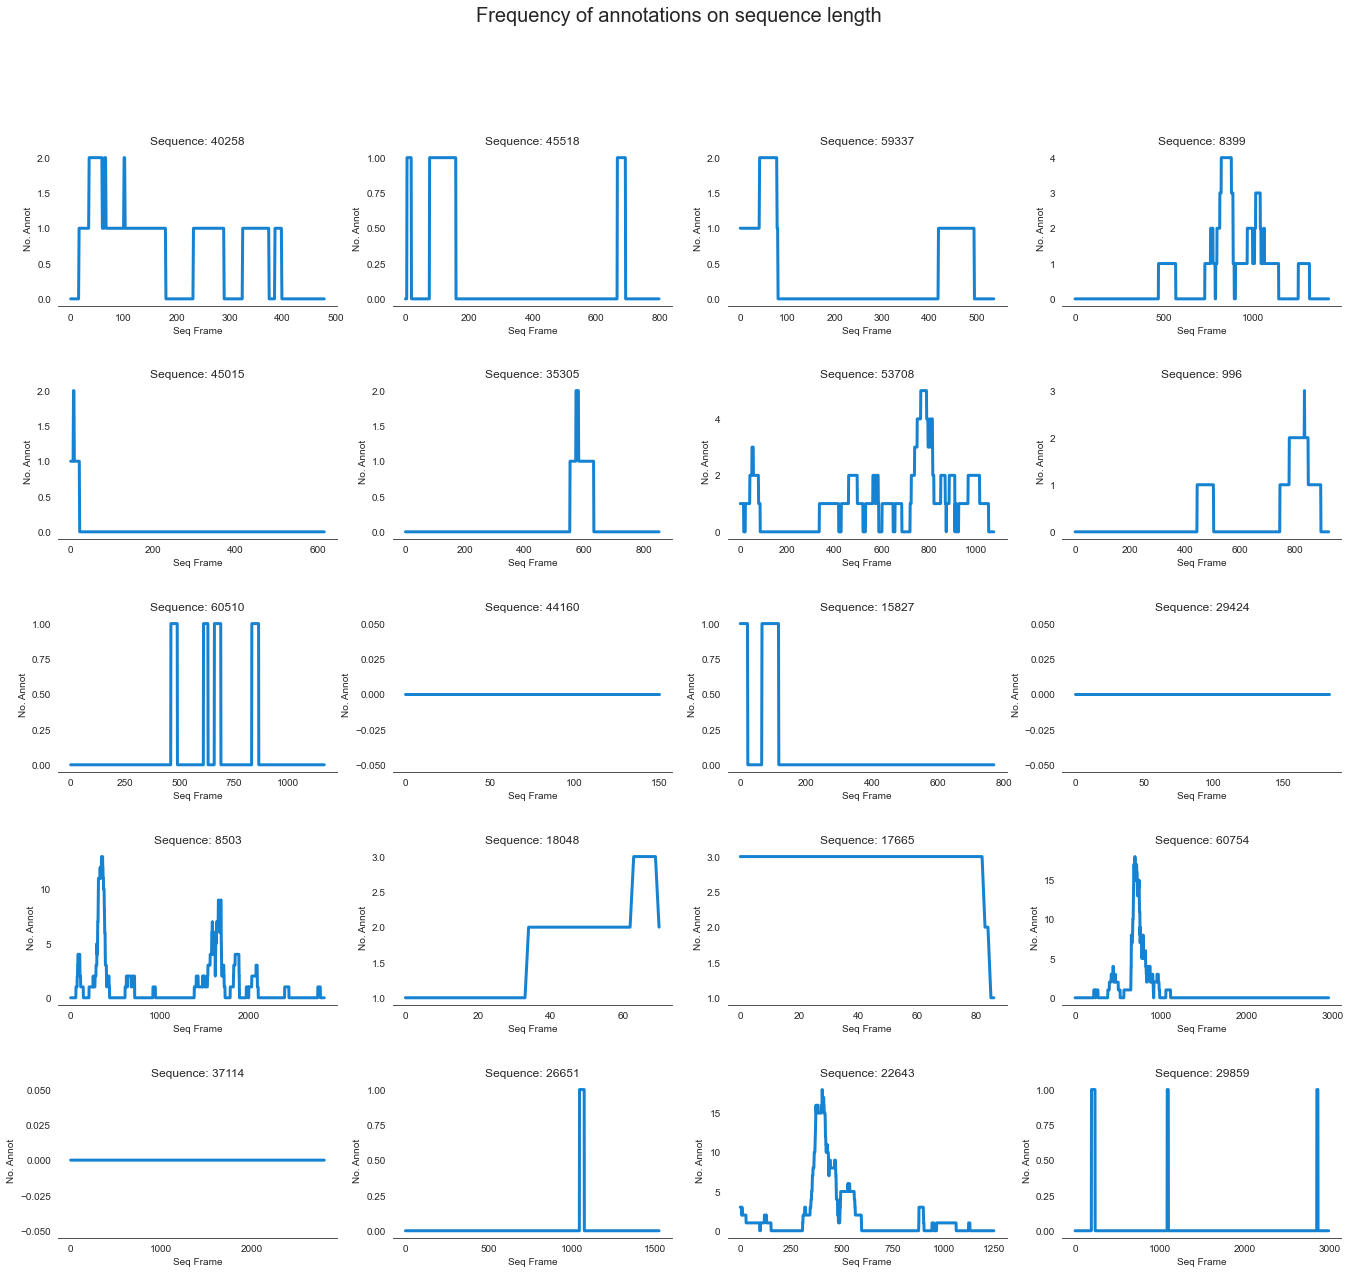

In [64]:
# List of unique sequence values
sequences = list(train_df["sequence"].unique())

plt.figure(figsize=(23,20))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
plt.suptitle("Frequency of annotations on sequence length", fontsize = 20)

# Enumerate through all sequences
for k, sequence in enumerate(sequences):
    train_df[train_df["sequence"] == sequence]
    df_seq = train_df[train_df["sequence"] == sequence]
    
    plt.subplot(5, 4, k+1)
    plt.title(f"Sequence: {sequence}", fontsize = 12)
    plt.xlabel("Seq Frame", fontsize=10)
    plt.ylabel("No. Annot", fontsize=10)
    plt.xticks(fontsize=10); plt.yticks(fontsize=10)
    sns.lineplot(x=df_seq["sequence_frame"], y=df_seq["no_annotations"],
                 color=my_colors[2], lw=3)

Visualize frame

In [65]:
base_folder = "./kaggle/input/train_images"

train_df["path"] = base_folder + "/video_" + \
                    train_df['video_id'].astype(str) + "/" +\
                    train_df['video_frame'].astype(str) +".jpg"

In [66]:
# === Show image and annotations if applicable ===
def show_image(path, annot, axs=None):
    if axs==None:
        fig, axs = plt.subplots(figsize=(23, 8))
    
    img = plt.imread(path)
    axs.imshow(img)

    if annot:
        for a in eval(annot):
            rect = patches.Rectangle((a["x"], a["y"]), a["width"], a["height"], 
                                     linewidth=3, edgecolor="#FF6103", facecolor='none')
            axs.add_patch(rect)
            axs.annotate("Starfish", (a["x"], a["y"]), color='w', weight='bold', 
                fontsize=10, va='center')

    axs.axis("off")


Path: ./kaggle/input/train_images/video_0/0.jpg
Annotation: []
Frame:


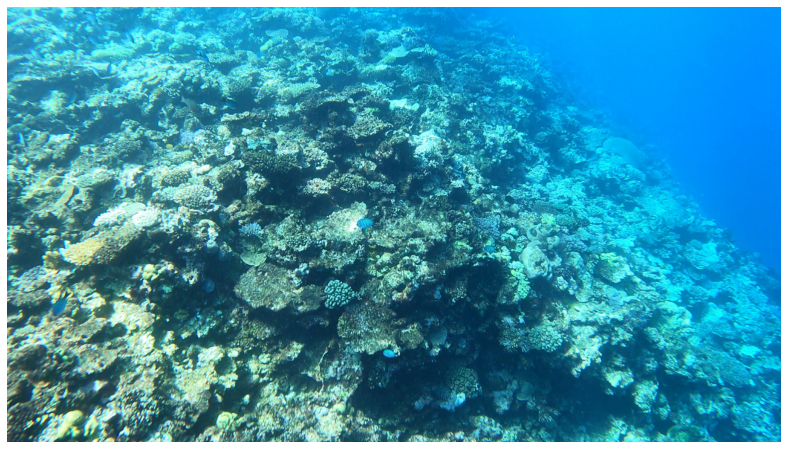

In [67]:
# Show only 1 image as example
path = list(train_df[train_df["no_annotations"]==0]["path"])[0]
annot = list(train_df[train_df["no_annotations"]==0]["annotations"])[0]

image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

print(color.S+"Path:"+color.E, path)
print(color.S+"Annotation:"+color.E, annot)
print(color.S+"Frame:"+color.E)
show_image(path, annot, axs=None)

Path: ./kaggle/input/train_images/video_1/9114.jpg
Annotation: [{'x': 628, 'y': 321, 'width': 42, 'height': 47}, {'x': 893, 'y': 497, 'width': 65, 'height': 61}, {'x': 853, 'y': 413, 'width': 49, 'height': 44}, {'x': 749, 'y': 666, 'width': 57, 'height': 53}, {'x': 625, 'y': 669, 'width': 57, 'height': 48}, {'x': 402, 'y': 162, 'width': 46, 'height': 48}, {'x': 687, 'y': 159, 'width': 38, 'height': 39}, {'x': 639, 'y': 65, 'width': 44, 'height': 32}, {'x': 614, 'y': 72, 'width': 40, 'height': 33}, {'x': 830, 'y': 164, 'width': 56, 'height': 50}, {'x': 537, 'y': 154, 'width': 26, 'height': 25}, {'x': 357, 'y': 85, 'width': 33, 'height': 25}, {'x': 405, 'y': 323, 'width': 28, 'height': 30}, {'x': 677, 'y': 69, 'width': 46, 'height': 31}, {'x': 314, 'y': 105, 'width': 24, 'height': 21}, {'x': 650, 'y': 356, 'width': 27, 'height': 42}, {'x': 1129, 'y': 689, 'width': 59, 'height': 30}, {'x': 1140, 'y': 674, 'width': 69, 'height': 36}]
Frame:


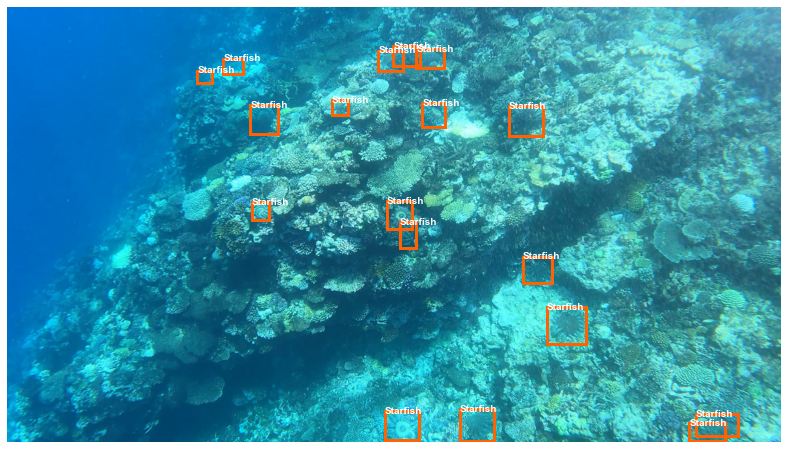

In [68]:
# Show only 1 image as example
N=18
path = list(train_df[train_df["no_annotations"]==N]["path"])[0]
annot = list(train_df[train_df["no_annotations"]==N]["annotations"])[0]

image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

print(color.S+"Path:"+color.E, path)
print(color.S+"Annotation:"+color.E, annot)
print(color.S+"Frame:"+color.E)
show_image(path, annot, axs=None)

In [69]:
# Save dataset
train_df.to_csv("train.csv", index=False)